In [1]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plotly
# import plotly.offline as py
# import plotly.graph_objs as go
import plotly.express as px
# import scatt
import seaborn as sns

In [3]:
#reading the data

sleep = pd.read_csv("sleep_final2_v1.csv")
# labels = pd.read_csv("DATA 624- COURSE PROJECT-DATA LABELING TASK - Sleep Disorders.csv")

In [4]:
# labels
sleep

,id,Label,created_at,favorite_count,favorited,place.province,population,truncated,tweet_text_final,user.created_at,user.favourites_count,user.followers_count,user.friends_count,user.listed_count,user.location,user.statuses_count
0,5d0d66e244578a0ea45248f2,"Self-report: Yes, Sleep Disorder: Yes",Fri Mar 29 00:54:08 +0000 2019,0,0,Ontario,14659616,0,Gotta wake up early tomorrow ðŸ˜«,Wed Mar 04 04:08:10 +0000 2009,17255,658,983,37,"Toronto, Ontario",39742
1,5d0d681844578a0ea453715b,"Self-report: Yes, Sleep Disorder: Yes",Tue Mar 26 23:28:19 +0000 2019,0,0,Nova Scotia,976768,0,rozinck Picked that up at Farm Assists after g...,Sun Mar 08 18:05:50 +0000 2009,44516,2801,2479,108,Kâ€™jipuktuk / Halifax,54902
2,5d0d69ac44578a0ea4550911,"Self-report: Yes, Sleep Disorder: Yes",Mon Apr 01 07:47:02 +0000 2019,0,0,Ontario,14659616,1,Iâ€™ve been having the urge to sleep on my bac...,Sun Apr 05 16:42:44 +0000 2009,10338,8116,1505,67,"Toronto, Ontario",180515
3,5d0d6a0244578a0ea45563ba,"Self-report: Yes, Sleep Disorder: No",Mon Apr 01 07:50:55 +0000 2019,0,0,Ontario,14659616,1,My #Sunday sleep & naps all day...ðŸ˜´ðŸ˜´ðŸ˜...,Fri May 14 06:40:44 +0000 2010,680,614,1131,99,"Toronto, Ontario (Canada)",118783
4,5d0d6b5944578a0ea456a87f,"Self-report: Yes, Sleep Disorder: No",Mon Apr 01 08:01:16 +0000 2019,0,0,Alberta,4395586,0,Friend in the middle of the night notifies me ...,Sun Jan 02 20:41:00 +0000 2011,12397,113,498,2,"Calgary, Alberta",6311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,5d0dcf6744578a0ea49a47e3,"Self-report: Yes, Sleep Disorder: Yes",Mon Apr 15 14:23:04 +0000 2019,0,0,Saskatchewan,1178657,1,I'm a pretty active sleeper. Last night I woke...,Sat Feb 12 18:33:56 +0000 2011,4382,858,1616,17,"Regina, Saskatchewan",3555
6002,5d0dc68744578a0ea4e45d52,"Self-report: Yes, Sleep Disorder: Yes",Sun Apr 14 21:30:06 +0000 2019,0,0,Saskatchewan,1178657,1,The other of course is how long do I get to sl...,Mon Jun 14 05:39:19 +0000 2010,26220,617,1124,27,"Regina, Saskatchewan",34349
6003,5d0dd62144578a0ea45dee17,"Self-report: Yes, Sleep Disorder: Yes",Fri Apr 26 14:35:01 +0000 2019,0,0,Saskatchewan,1178657,1,Anyone else super exhausted this month? I have...,Tue Sep 04 15:34:24 +0000 2012,19680,2458,2871,41,"Regina, Saskatchewan",3079
6004,5d0dd72544578a0ea47ab061,"Self-report: Yes, Sleep Disorder: Yes",Tue Apr 16 09:29:40 +0000 2019,0,0,Saskatchewan,1178657,1,Thanks #Alberta!!! I canâ€™t sleep tonight and...,Wed Jan 06 15:52:32 +0000 2016,25145,963,1008,52,"Saskatchewan, Canada",2017


In [5]:
sleep['Label'].unique()

array(['Self-report: Yes, Sleep Disorder: Yes',
       'Self-report: Yes, Sleep Disorder: No',
       'Self-report: No, Sleep Disorder: Yes', 'Not Clear',
       'Self-report: No, Sleep Disorder: No', nan], dtype=object)

In [6]:
sleep_df = sleep[sleep['Label'].isin(['Self-report: Yes, Sleep Disorder: No','Self-report: Yes, Sleep Disorder: Yes']) ]
sleep_df['Label'].unique()

array(['Self-report: Yes, Sleep Disorder: Yes',
       'Self-report: Yes, Sleep Disorder: No'], dtype=object)

In [7]:
len(sleep_df)

4185

In [10]:
# sleep.rename(columns={"_id": "TweetID"}, inplace = True)
# sleep.head()

In [14]:
# data = pd.merge(sleep, label_df, on='TweetID', how='inner')
# data
Tweet_df['Province'].unique()

array(['Ontario', 'Nova Scotia', 'Alberta', 'Quebec', 'British Columbia',
       'Saskatchewan', 'Northwest Territories', 'Manitoba',
       'Newfoundland and Labrador', nan, 'New Brunswick', 'Nunavut',
       'Prince Edward Island', 'Yukon'], dtype=object)

In [22]:
Tweet_df = pd.DataFrame(sleep_df['created_at'].str[:3])
Tweet_df.rename(columns={"created_at": "Weekday"}, inplace = True)
Tweet_df['Province'] = sleep_df['place.province']
Tweet_df

,Weekday,Province
0,Fri,Ontario
1,Tue,Nova Scotia
2,Mon,Ontario
3,Mon,Ontario
4,Mon,Alberta
...,...,...
6001,Mon,Saskatchewan
6002,Sun,Saskatchewan
6003,Fri,Saskatchewan
6004,Tue,Saskatchewan


In [23]:
Tweet_df['Time'] = (sleep_df['created_at'].str[10:13].astype(int) + (sleep_df['created_at'].str[14:16].astype(int)/60))
Tweet_df

,Weekday,Province,Time
0,Fri,Ontario,0.900000
1,Tue,Nova Scotia,23.466667
2,Mon,Ontario,7.783333
3,Mon,Ontario,7.833333
4,Mon,Alberta,8.016667
...,...,...,...
6001,Mon,Saskatchewan,14.383333
6002,Sun,Saskatchewan,21.500000
6003,Fri,Saskatchewan,14.583333
6004,Tue,Saskatchewan,9.483333


In [24]:
Tweet_df['Label'] = sleep_df['Label']
Tweet_df

,Weekday,Province,Time,Label
0,Fri,Ontario,0.900000,"Self-report: Yes, Sleep Disorder: Yes"
1,Tue,Nova Scotia,23.466667,"Self-report: Yes, Sleep Disorder: Yes"
2,Mon,Ontario,7.783333,"Self-report: Yes, Sleep Disorder: Yes"
3,Mon,Ontario,7.833333,"Self-report: Yes, Sleep Disorder: No"
4,Mon,Alberta,8.016667,"Self-report: Yes, Sleep Disorder: No"
...,...,...,...,...
6001,Mon,Saskatchewan,14.383333,"Self-report: Yes, Sleep Disorder: Yes"
6002,Sun,Saskatchewan,21.500000,"Self-report: Yes, Sleep Disorder: Yes"
6003,Fri,Saskatchewan,14.583333,"Self-report: Yes, Sleep Disorder: Yes"
6004,Tue,Saskatchewan,9.483333,"Self-report: Yes, Sleep Disorder: Yes"


In [ ]:

#     UTC-03:30 Newfoundland Time Zone includes the entire island of Newfoundland and the southeastern part of the Labrador region.
#     UTC-04:00 Atlantic Time Zone comprises most of Labrador and three other provinces - New Brunswick (NB), Nova Scotia (NS), Prince Edward Island (PE).
#     UTC-05:00 Eastern Time Zone encompasses the eastern part of Nunavut (NU), most of Ontario (ON) and Quebec (QC) provinces.
#     UTC-06:00 Central Time Zone includes entire Manitoba (MB), Saskatchewan (SK) with small exception and quite a big piece of Nunavut (NU).
#     UTC-07:00 Mountain Time Zone comprises wholly Alberta (AB) and Northwest Territories (NT), also the western part of Nunavut (NU), the small exception in Saskatchewan (SK), the eastern and southeastern districts of British Columbia (BC).
#     UTC-08:00 Pacific Time Zone covers most of British Columbia (BC) and entire Yukon (YT).
# Reference: https://www.countries-ofthe-world.com/time-zones-canada.html

In [25]:
Time_Adj = [['Ontario', -5], ['Nova Scotia', -4], ['Alberta', -7], ['Quebec', -5], ['British Columbia', -8],
       ['Saskatchewan', -6], ['Northwest Territories', -7], ['Manitoba', -6],
       ['Newfoundland and Labrador', -3.5], ['New Brunswick', -4], ['Nunavut', -5],
       ['Prince Edward Island', -4], ['Yukon', -8]]
Time_Adj = pd.DataFrame(Time_Adj)
Time_Adj.rename(columns={0: "Province", 1: "Time_Adj"}, inplace = True)
Time_Adj

,Province,Time_Adj
0,Ontario,-5.0
1,Nova Scotia,-4.0
2,Alberta,-7.0
3,Quebec,-5.0
4,British Columbia,-8.0
5,Saskatchewan,-6.0
6,Northwest Territories,-7.0
7,Manitoba,-6.0
8,Newfoundland and Labrador,-3.5
9,New Brunswick,-4.0


In [26]:
data = pd.merge(Tweet_df, Time_Adj, on='Province', how='inner')
data

,Weekday,Province,Time,Label,Time_Adj
0,Fri,Ontario,0.900000,"Self-report: Yes, Sleep Disorder: Yes",-5.0
1,Mon,Ontario,7.783333,"Self-report: Yes, Sleep Disorder: Yes",-5.0
2,Mon,Ontario,7.833333,"Self-report: Yes, Sleep Disorder: No",-5.0
3,Tue,Ontario,23.800000,"Self-report: Yes, Sleep Disorder: Yes",-5.0
4,Tue,Ontario,3.566667,"Self-report: Yes, Sleep Disorder: No",-5.0
...,...,...,...,...,...
4137,Mon,Prince Edward Island,14.516667,"Self-report: Yes, Sleep Disorder: Yes",-4.0
4138,Thu,Yukon,2.933333,"Self-report: Yes, Sleep Disorder: Yes",-8.0
4139,Fri,Yukon,17.766667,"Self-report: Yes, Sleep Disorder: No",-8.0
4140,Sat,Yukon,10.766667,"Self-report: Yes, Sleep Disorder: No",-8.0


In [27]:
data['Adjusted_Time'] = data['Time'] + data['Time_Adj']
data

,Weekday,Province,Time,Label,Time_Adj,Adjusted_Time
0,Fri,Ontario,0.900000,"Self-report: Yes, Sleep Disorder: Yes",-5.0,-4.100000
1,Mon,Ontario,7.783333,"Self-report: Yes, Sleep Disorder: Yes",-5.0,2.783333
2,Mon,Ontario,7.833333,"Self-report: Yes, Sleep Disorder: No",-5.0,2.833333
3,Tue,Ontario,23.800000,"Self-report: Yes, Sleep Disorder: Yes",-5.0,18.800000
4,Tue,Ontario,3.566667,"Self-report: Yes, Sleep Disorder: No",-5.0,-1.433333
...,...,...,...,...,...,...
4137,Mon,Prince Edward Island,14.516667,"Self-report: Yes, Sleep Disorder: Yes",-4.0,10.516667
4138,Thu,Yukon,2.933333,"Self-report: Yes, Sleep Disorder: Yes",-8.0,-5.066667
4139,Fri,Yukon,17.766667,"Self-report: Yes, Sleep Disorder: No",-8.0,9.766667
4140,Sat,Yukon,10.766667,"Self-report: Yes, Sleep Disorder: No",-8.0,2.766667


In [28]:
for i in range(len(data)):
    if data['Adjusted_Time'][i] < 0:
        data['Adjusted_Time'][i] += 24
        
data
        

C:\Users\marut\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Weekday,Province,Time,Label,Time_Adj,Adjusted_Time
0,Fri,Ontario,0.900000,"Self-report: Yes, Sleep Disorder: Yes",-5.0,19.900000
1,Mon,Ontario,7.783333,"Self-report: Yes, Sleep Disorder: Yes",-5.0,2.783333
2,Mon,Ontario,7.833333,"Self-report: Yes, Sleep Disorder: No",-5.0,2.833333
3,Tue,Ontario,23.800000,"Self-report: Yes, Sleep Disorder: Yes",-5.0,18.800000
4,Tue,Ontario,3.566667,"Self-report: Yes, Sleep Disorder: No",-5.0,22.566667
...,...,...,...,...,...,...
4137,Mon,Prince Edward Island,14.516667,"Self-report: Yes, Sleep Disorder: Yes",-4.0,10.516667
4138,Thu,Yukon,2.933333,"Self-report: Yes, Sleep Disorder: Yes",-8.0,18.933333
4139,Fri,Yukon,17.766667,"Self-report: Yes, Sleep Disorder: No",-8.0,9.766667
4140,Sat,Yukon,10.766667,"Self-report: Yes, Sleep Disorder: No",-8.0,2.766667


In [30]:
data.to_excel('Tweet_time.xlsx')

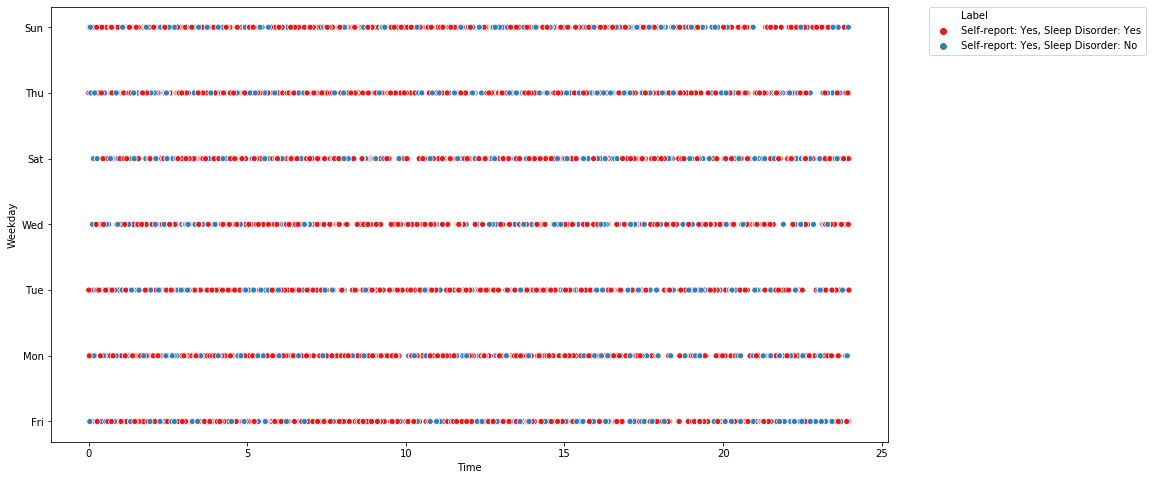

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(y='Weekday', x='Time', hue="Label", data=data , palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [32]:
df['Weekday'].unique()

NameError: name 'df' is not defined

In [33]:
week = pd.DataFrame([['Sun',0],['Mon',1],['Tue',2],['Wed',3],['Thu',4],['Fri',5], ['Sat', 6]])
week.rename(columns={0: "Weekday"}, inplace = True)
week

,Weekday,1
0,Sun,0
1,Mon,1
2,Tue,2
3,Wed,3
4,Thu,4
5,Fri,5
6,Sat,6


In [34]:
label = pd.DataFrame([['Self-report: Yes, Sleep Disorder: No',0],['Self-report: Yes, Sleep Disorder: Yes',1]])
label.rename(columns={0: "Label"}, inplace = True)
label

,Label,1
0,"Self-report: Yes, Sleep Disorder: No",0
1,"Self-report: Yes, Sleep Disorder: Yes",1


In [37]:
Tweet_df = pd.merge(data, week, on='Weekday', how='inner')
Tweet_df = pd.merge(Tweet_df, label, on='Label', how='inner')
Tweet_df

,Weekday,Province,Time,Label,Time_Adj,Adjusted_Time,1_x,1_y
0,Fri,Ontario,0.900000,"Self-report: Yes, Sleep Disorder: Yes",-5.0,19.900000,5,1
1,Fri,Ontario,2.383333,"Self-report: Yes, Sleep Disorder: Yes",-5.0,21.383333,5,1
2,Fri,Ontario,2.566667,"Self-report: Yes, Sleep Disorder: Yes",-5.0,21.566667,5,1
3,Fri,Ontario,2.666667,"Self-report: Yes, Sleep Disorder: Yes",-5.0,21.666667,5,1
4,Fri,Ontario,2.816667,"Self-report: Yes, Sleep Disorder: Yes",-5.0,21.816667,5,1
...,...,...,...,...,...,...,...,...
4137,Sun,Newfoundland and Labrador,9.333333,"Self-report: Yes, Sleep Disorder: No",-3.5,5.833333,0,0
4138,Sun,New Brunswick,2.266667,"Self-report: Yes, Sleep Disorder: No",-4.0,22.266667,0,0
4139,Sun,New Brunswick,3.733333,"Self-report: Yes, Sleep Disorder: No",-4.0,23.733333,0,0
4140,Sun,New Brunswick,12.816667,"Self-report: Yes, Sleep Disorder: No",-4.0,8.816667,0,0


In [36]:
Tweet_df

,Weekday,Province,Time,Label,Time_Adj,Adjusted_Time,1
0,Fri,Ontario,0.900000,"Self-report: Yes, Sleep Disorder: Yes",-5.0,19.900000,1
1,Mon,Ontario,7.783333,"Self-report: Yes, Sleep Disorder: Yes",-5.0,2.783333,1
2,Tue,Ontario,23.800000,"Self-report: Yes, Sleep Disorder: Yes",-5.0,18.800000,1
3,Mon,Ontario,9.333333,"Self-report: Yes, Sleep Disorder: Yes",-5.0,4.333333,1
4,Wed,Ontario,0.600000,"Self-report: Yes, Sleep Disorder: Yes",-5.0,19.600000,1
...,...,...,...,...,...,...,...
4137,Thu,Prince Edward Island,16.450000,"Self-report: Yes, Sleep Disorder: No",-4.0,12.450000,0
4138,Mon,Prince Edward Island,10.266667,"Self-report: Yes, Sleep Disorder: No",-4.0,6.266667,0
4139,Fri,Yukon,17.766667,"Self-report: Yes, Sleep Disorder: No",-8.0,9.766667,0
4140,Sat,Yukon,10.766667,"Self-report: Yes, Sleep Disorder: No",-8.0,2.766667,0


In [40]:
df = Tweet_df.drop(columns = ["Weekday", "Label", "Province", "Time", "Time_Adj"])
df.rename(columns={'1_x': "Week"}, inplace = True)
df.rename(columns={'1_y': "Label"}, inplace = True)
df

,Adjusted_Time,Week,Label
0,19.900000,5,1
1,21.383333,5,1
2,21.566667,5,1
3,21.666667,5,1
4,21.816667,5,1
...,...,...,...
4137,5.833333,0,0
4138,22.266667,0,0
4139,23.733333,0,0
4140,8.816667,0,0


In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(df)

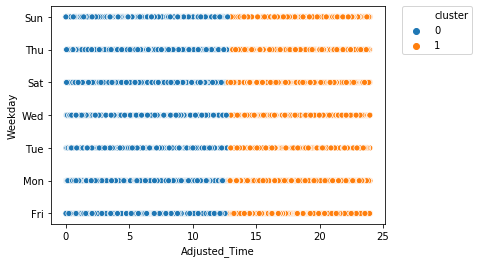

In [42]:
# show the two clusters in a scatter plot
import seaborn as sns

# del df['cluster']
Tweet_df['cluster'] = kmeans.labels_
sns.scatterplot(y='Weekday', x='Adjusted_Time', hue="cluster", data=Tweet_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

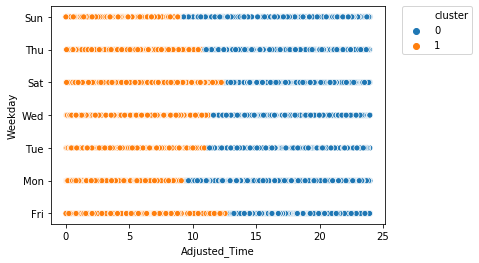

In [43]:
from sklearn.cluster import AgglomerativeClustering

del Tweet_df['cluster']
ac = AgglomerativeClustering(n_clusters=2).fit(df)
Tweet_df['cluster'] = ac.labels_
sns.scatterplot(y='Weekday', x='Adjusted_Time', hue="cluster", data=Tweet_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [60]:
df = data.drop(columns = ["Province", "Time", "Time_Adj"])
df

,Weekday,Label,Adjusted_Time
0,Fri,"Self-report: Yes, Sleep Disorder: Yes",19.900000
1,Mon,"Self-report: Yes, Sleep Disorder: Yes",2.783333
2,Mon,"Self-report: Yes, Sleep Disorder: No",2.833333
3,Tue,"Self-report: Yes, Sleep Disorder: Yes",18.800000
4,Tue,"Self-report: Yes, Sleep Disorder: No",22.566667
...,...,...,...
4137,Mon,"Self-report: Yes, Sleep Disorder: Yes",10.516667
4138,Thu,"Self-report: Yes, Sleep Disorder: Yes",18.933333
4139,Fri,"Self-report: Yes, Sleep Disorder: No",9.766667
4140,Sat,"Self-report: Yes, Sleep Disorder: No",2.766667


In [64]:
df.index = [df['Weekday'],df['Label']]
df.drop(columns = ['Weekday', 'Label'], inplace=True)
df

Adjusted_Time
Weekday Label                                               
Fri     Self-report: Yes, Sleep Disorder: Yes      19.900000
Mon     Self-report: Yes, Sleep Disorder: Yes       2.783333
        Self-report: Yes, Sleep Disorder: No        2.833333
Tue     Self-report: Yes, Sleep Disorder: Yes      18.800000
        Self-report: Yes, Sleep Disorder: No       22.566667
...                                                      ...
Mon     Self-report: Yes, Sleep Disorder: Yes      10.516667
Thu     Self-report: Yes, Sleep Disorder: Yes      18.933333
Fri     Self-report: Yes, Sleep Disorder: No        9.766667
Sat     Self-report: Yes, Sleep Disorder: No        2.766667
Mon     Self-report: Yes, Sleep Disorder: No       22.616667

[4142 rows x 1 columns]

In [67]:
df_ts = df.reset_index(['Label'])
df_ts

,Label,Adjusted_Time
Weekday,,
Fri,"Self-report: Yes, Sleep Disorder: Yes",19.900000
Mon,"Self-report: Yes, Sleep Disorder: Yes",2.783333
Mon,"Self-report: Yes, Sleep Disorder: No",2.833333
Tue,"Self-report: Yes, Sleep Disorder: Yes",18.800000
Tue,"Self-report: Yes, Sleep Disorder: No",22.566667
...,...,...
Mon,"Self-report: Yes, Sleep Disorder: Yes",10.516667
Thu,"Self-report: Yes, Sleep Disorder: Yes",18.933333
Fri,"Self-report: Yes, Sleep Disorder: No",9.766667


In [56]:
display(df.stack().values)

array(['Self-report: Yes, Sleep Disorder: Yes', 19.9,
       'Self-report: Yes, Sleep Disorder: Yes', ..., 2.7666666666666675,
       'Self-report: Yes, Sleep Disorder: No', 22.616666666666667],
      dtype=object)

In [53]:
df_ts = df_ts.reset_index(['Label'])
df_ts

KeyError: 'Requested level (Label) does not match index name (None)'

ValueError: Unknown format code 'd' for object of type 'float'

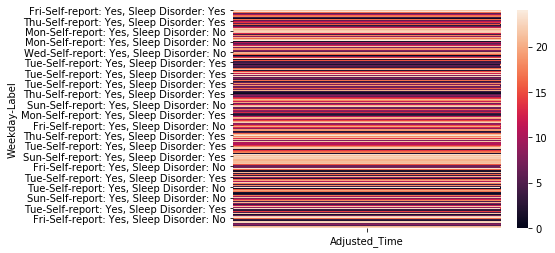

In [65]:
ax = sns.heatmap(df, annot=True, fmt="d")